## 시간 흐름에 따른 개발 언어 인기도 분석 

- 오늘날 여전히 사용되는 가장 오랜된 개발 언어는 1957년에 개발된 포트란(FORTRAN)이다. 이후로 많은 개발 언어가 발전해왔다. 그런데 가장 인기 있는 개발 언어는 무엇일까? 
- 이 뜨거운 질문에 대한 대한 답은 스택 오버플로우(Stack Overflow)에서 도움을 받을 수 있다. 스택 오버플로우의 각 게시물은 태그가 함께 제공되며, 개발 언어 이름이 태그가 될 수 있다. 
- 어떤 언어가 가장 인기 있는지 알아내려면 스택 오버플로우에서 각 언어로 태그가 지정된 게시물 수를 계산하면 된다.(가장 많은 게시물을 가진 언어가 바로 인기가 많은 개발 언어라고 할 수 있다.)

### 여기서 배울 내용 
1. 맷플롯립(Matplotlib)으로 데이터를 시각화 하고 차트를 만드는 법
2. 판다스로 데이터를 피벗, 그룹화 및 조작하여 원하는 형식으로 가져오는 방법 
3. 타임스템프 및 시계열 데이터로 작업하는 방법
4. 원하는 대로 꺾은선형 차트의 스타일을 사용자 지정하는 방법

### 데이터를 얻는 법
- 제공된 .csv 파일을 사용하거나 (선택적으로) StackExchange에서 SQL 쿼리를 실행하여 새로운 (가장 신선한?) 데이터를 얻어보아라.
- 제공되는 해당 링크 따라 [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com)에서 쿼리를 실행하여 .csv 파일을 얻어보아라/
- SQL 쿼리문
<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

- 이미 제공된 CSV 파일을 사용해도 무관함

### 1. 데이터 열기 및 탐색

In [1]:
# 필요한 패키지 부르기 
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [3]:
# 데이터 판다스로 읽고, 컬럼명 지정하기 
df = pd.read_csv('QueryResults.csv')
df.columns = ['DATE', 'TAG', 'POSTS']
df

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124
...,...,...,...
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182


In [2]:
# 데이터 불러오기 또다른 방법 - 여기서 헤더 행을 0으로 설정하면 열 자체의 이름으로 대처할 수 있음
df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)
df

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124
...,...,...,...
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182


In [3]:
# 현제 데이터의 행과 열의 개수 파악
df.shape

(1991, 3)

- 해당 csv 파일의 데이터의 총개수는 아래와 같다.
    - 행: 1,991 건
    - 열: 3건

In [4]:
# 각 열에 있는 항목의 수 세기 
df.count()

DATE     1991
TAG      1991
POSTS    1991
dtype: int64

- 만약 열에 있는 항목의 수를 세기 위해서 `.count()`를 사용할 수 있다. count()는 실제로 각 열에 있는 NaN이 아닌 값의 개수를 알려준다.

### 2. 개발 언어 분석 
- 해당 데이터 중 "TAG"는 언어의 이름이다. 예를 들어, 첫 행을 보면 2008년 7월에 C# 언어 태그가 지정된 게시물이 3개가 있었다. "TAG"가 카테고리 역할을 한다고 했을 때 언어당 게시물 수를 계산하는 방법을 알 수는 없을까? 
- 스택 오버플로우가 만들어진 이후, 가장 많은 수의 게시물을 보유한 언어는 무엇일까? 
- 또한 일부 언어는 C만큼 오래되었고, Swift 같은 새로운 언어도 존재한다. 2008년 7월에 시작하므로 일분 언어는 매워 게시물이 전혀 없을 것인데, 각 개발 언어당 게시물이 몇 개월간 존재하는지 세볼 수 있을까?

In [5]:
# 스택 오버플로우에서 가장 많은 게시물을 보유한 언어 탐색
df.groupby('TAG').sum()

,POSTS
TAG,
assembly,34852
c,336042
c#,1423530
c++,684210
delphi,46212
go,47499
java,1696403
javascript,2056510
perl,65286


In [6]:
# 스택 오버플로우에서 개발 언어당 항목이 몇 개월 존재했는지 탐색 
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144


- 데이터 탐색 결과는 아래와 같다. 
    - 스택 오버플로우에서 가장 많은 게시물을 보유한 언어는 2,056,510건이 포스트 된 "javascript" 이다. 
    - 각 개발 언어당 게시물이 몇 개월간 존재하는지 살보았다. 그중에서 가장 많은 개월 수를 가진 언어는 145개월인 "C#"이었다.

### 3. 타임스탬프 작업 

#### 3-1. 개별 셀 선택 

In [9]:
# 날짜 두 번째 항목 조회
df['DATE'][1]

'2008-08-01 00:00:00'

- 데이터 프레임 'DATE'열에서 "[]" 표기를 사용해서 열의 n번쨰 항목을 살펴 볼 수 있다. 

In [10]:
# 열의 이름이 공백이 없는 경우 
df.DATE[1]

'2008-08-01 00:00:00'

- 만약 열의 이름에 공백이 없는 경우 "."표기를 사용할 수 있다.

#### 3-2. 데이터 유형 검사

In [11]:
# 'DATE'열 데이터 유형 검사 
type(df['DATE'][1])

str

- 위의 셀 내용을 입력할 때 날짜 개체가 아니라 문자열로 하고 있다는 것을 확인할 수 있다. 문자열 형식이 항상 필요하지 않은 00:00:00을 보여주고 있을 뿐만 아니라 날짜와 시간을 처리해주는 Datetme 개체로 작업하는 이점을 살리지 못하고 있다.

In [12]:
# 문자열에서 Datetime으로 데이터타입 바꾸기 
print(pd.to_datetime(df.DATE[1]))
type(pd.to_datetime(df.DATE[1]))

2008-08-01 00:00:00


pandas._libs.tslibs.timestamps.Timestamp

- 판다스는 "to_datetime()" 메소드를 사용하여 문자열 타임스탬프로 변환하는데 도움을 준다.

In [13]:
# 판다스에서 "to_datetime()"을 사용하여 전체 "DATE"열 반환 
df.DATE = pd.to_datetime(df.DATE)
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


### 4. 데이터프레임 피벗하기

#### 4-1. `.pivot()` 메소드 
- 데이터프레임을 변환하여 각각의 범주가 고유의 열을 갖도록 해야할 떄가 있다. 예를들어 아래 표를 가져와 각 배우에 대해 별도의 열을 만들어야 한다고 가전해보자. 여기서 각 행은 배우의 나이이다.

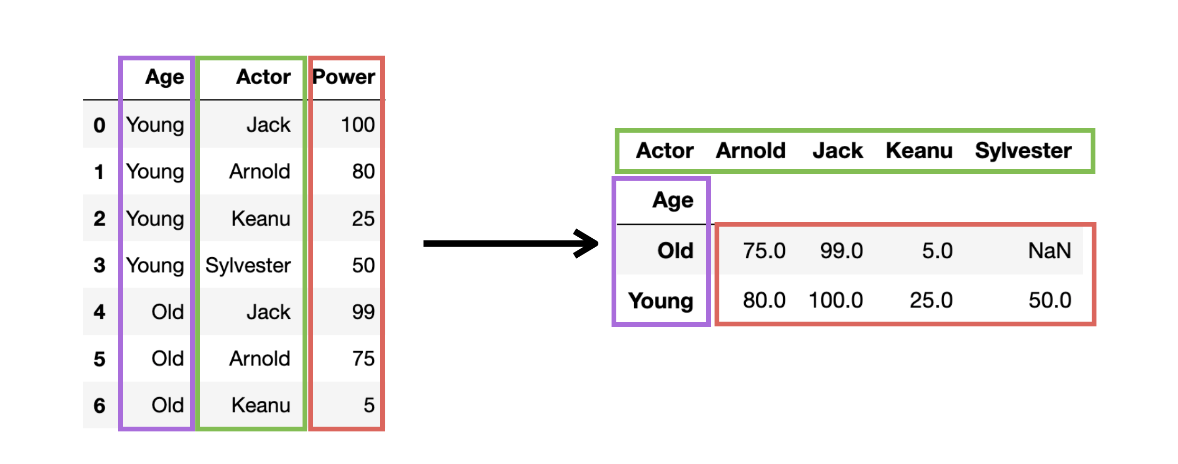

In [14]:
# test 데이터프레임 만들기
test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'],
                        'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu', 'Sylvester'],
                        'Power': [100, 80, 25, 50, 99, 75, 5, 30]})
test_df

,Age,Actor,Power
0,Young,Jack,100
1,Young,Arnold,80
2,Young,Keanu,25
3,Young,Sylvester,50
4,Old,Jack,99
5,Old,Arnold,75
6,Old,Keanu,5
7,Old,Sylvester,30


- 위의 데이터프레임을 피벗으로 만드는 가장 쉬운 방법은 ".pivot()" 메소드를 사용하는 것이다.

In [15]:
# pivot table 만들기 
pivoted_df = test_df.pivot(index='Age', columns='Actor', values='Power')
pivoted_df

Actor,Arnold,Jack,Keanu,Sylvester
Age,,,,
Old,75,99,5,30
Young,80,100,25,50


- ".pivot()" 메소드에서 인덱스(index)는 행의 범주, 열(columns)은 열의 범주, 값(values)은 새로운 셀에서 원하는 것이 된다.
- 여기서 주의해야 할 중요한 것이 있다. 만약 값이 없다면, ".pivot()" 메소드가 NaN 값을 넣어준다.

#### 4-2. 위의 데이터프레임을 피벗으로 대입하기
- "df"의 데이터프레임을 피벗하여 각 행이 날짜가 되도록, 그리고 각 열이 개발언어가 되도록 "reshaped_df"라는 변수에 결과를 저장해보자
- 재구성 후 아래의 질문에 답해보자 
    - 재구성된 데이터프레임의 행과 열 각각 몇 개씩 있는가?
    - 데이터프레임의 head와 tail 부분은 어떠한가?
    - 열의 이름을 출력해보자 
    - 각 열의 항목수를 계산해보자

In [16]:
# pivot으로 재구성 
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0


In [17]:
# 재구성된 데이터프레임의 행과 열 각각 몇 개씩 있는가? - 재구성된 데이터프레임 크기 조회 
reshaped_df.shape

(145, 14)

- 재구성된 데이터프레임의 행과 열 각각 몇 개씩 있는가? 
    - 행 145개, 열 14개로 조회된다.

In [21]:
# 데이터프레임의 head와 tail 부분은 어떠한가? - 데이터프레임의 head 부분 출력 
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


In [18]:
# 데이터프레임의 head와 tail 부분은 어떠한가? - 데이터프레임의 tail 부분 출력 
reshaped_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0
2020-06-01,363.0,2757.0,9064.0,6161.0,214.0,765.0,13015.0,23360.0,203.0,7188.0,31817.0,6249.0,670.0,3733.0
2020-07-01,298.0,2294.0,9145.0,5756.0,212.0,743.0,12723.0,23802.0,182.0,7334.0,31261.0,5694.0,775.0,3607.0


- 데이터프레임의 head, tail 부분은 어떠한가? 
    - 확인 결과 NaN 값이 상당 부분 발견되었다.
    - 각 개발 언어가 열이 되었고, 날짜 열이 인덱스가 되었다.

In [19]:
# 열의 이름을 출력해보자 - 열의 이름을 출력
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

- 열의 이름을 출력 결과 
    - ['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'] 

In [22]:
# 각 열의 항목수를 계산해보자 - 각 열의 항목수 조회
reshaped_df.count()

TAG
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
dtype: int64

- 각 열의 항목수의 계산 결과 
    - NaN 값이 있는 열의 항목이 있어 각각 개수가 다르다.

- 정리
    - 새로운 데이터프레임에 145건의 행과 14건의 열이 있다. 
    - 각 개발 언어가 열이 되었고, 날짜 열이 새로운 인덱스가 되었다.
    - 각 열의 항목수를 조회해본 결과 모든 언어의 항목수가 각각 다르다는 것을 알 수 있다. (".count()" 메소드를 사용할 경우 NaN값은 제외해서 계산함)
    - 데이터프레임을 피벗할 때, 그 달에 해당 언어에 대한 게시물이 없다면 NaN 값이 삽입된다.

#### 4-3. NaN 값 다루기 
- 여기서 NaN 값이 있는 경우 해당 행을 삭제하지는 않을 것이다. 대신 NaN 값을 숫자 0으로 변환하려고 한다. 
- 여기서 ".fillna()" 메소드를 사용하여 작업을 수행하면 NaN 값을 채울 수 있다."

In [23]:
# NaN 값을 0으로 채우기 
reshaped_df.fillna(0, inplace=True)

- "inplace" 인자가 의미하는 것은 reshaped_df에 변경이 있다는 뜻이다.

In [ ]:
# NaN 값을 0으로 채우기 - "inplace" 인자 X
reshaped_df = reshaped_df.fillna(0)

- 만약 인자가 없다면 위와 같이 작성해주면 된다.

In [24]:
# 데이터 확인 
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


- 혹시 NaN 값이 남아있는지 확인하고 싶다면 전에 사용했던 ".isna()" 메소드를 사용해도된다. 
- 만약 values 속성과 any() 메소드를 연결하여 사용하게 되면, 전체 데이터프레임을 검색하지 않고 NaN값을 확인할 수 있다. (NaN이 하나라도 있다면 True / 없다면 False)

In [25]:
# 전체 NaN 값 검사 
reshaped_df.isna().values.any()

False

- 확인결과 더 이상의 NaN 값은 존재하지 않는다.

### 5. 맷플롯립으로 데이터 시각화 

#### 5-1. 맷플롯립(Matplotlib)
- 맷플롯립은 파이썬에서 차트와 그래프를 만드는데 도움을 주는 라이브러리 이다. 
- 맷플롯립은 판다스와 함꼐 사용시 궁합이 잘 맞는다.

In [26]:
# 맷플롯립 가져오기 
import matplotlib.pyplot as plt 

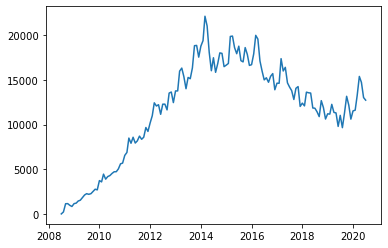

In [32]:
# 맷플롯립으로 자바 인기도 그래프 그리기 
plt.plot(reshaped_df.index, reshaped_df.java)
plt.show()

- 어떤 개발 언어의 인기도를 꺾은선형 차트로 보여줄 때 실제로 단 한 줄의 코드만으로 가능하다. 위의 그래프는 자바 개발 언어의 인기도를 라인 차트로 그린 것이다.
- 맷플롯립으로 그리는 방법은, 차트의 가로축(x값) 및 세로축(y값)에 대한 값을 넣어죽기만 하면 된다. 여기서 x값은 날짜이고, y값은 게시물의 수이다.
- 그리고 위와 같이 위치별로 해당 값을 ".plot()" 함수에 넣어줄 수 있다.  

In [ ]:
# 맷플롯립으로 자바 인기도 그래프 그리기 - 또다른 방법 
plt.plot(reshaped_df.index, reshaped_df["java"])

- 혹은 "[]" 표기가 편하다면 위와 같이 작성해도 무방하다.

#### 5-2. 차트 스타일 지정 
- 차트의 스타일을 지정하는데 도움이 되는 몇 가지 메소드를 소개한다.
    - `.figure()` - 차트 사이즈 조정
    - `.xticks()` - x축 구성
    - `.yticks()` - y축 구성
    - `.xlabel()` - x축에 텍스트 추가
    - `.ylabel()` - y축에 텍스트 추가
    - `.ylim()` - 상한 및 하한 설정

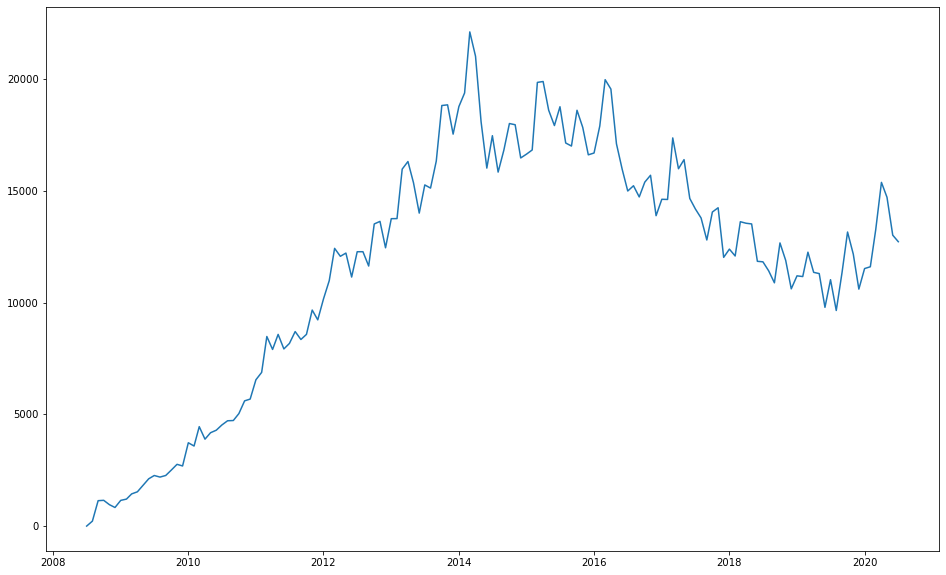

In [33]:
# 차트의 크기 조정 
plt.figure(figsize=(16,10))
plt.plot(reshaped_df.index, reshaped_df["java"])

- 만약 차트를 더 크게 하려면 그림의 "figsize"를 너비 16, 높이 10으로 해준다. 

- 차트 크기를 크게하면 차트가 보기 쉬워진다. 하지만 차트의 크기를 늘릴 때, 축에 있는 눈금의 글자 크기 역시 크게 해주는 것이 좋다.

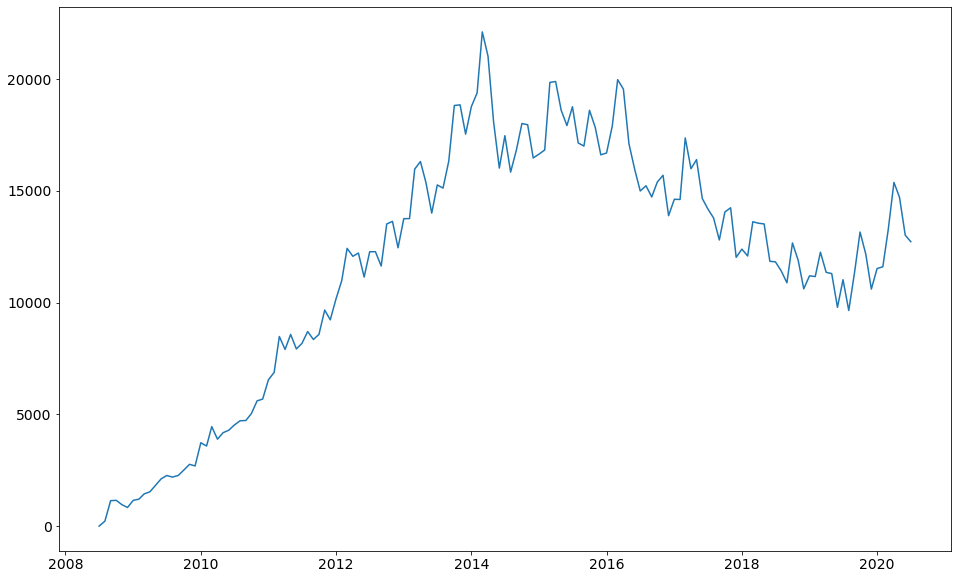

In [34]:
# fontsize 크기 조절 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(reshaped_df.index, reshaped_df.java)

- 이제 레이블을 추가해주면 된다. 또한 게시물은 0 밑이 될 수 없으므로 ".ylim()"에서 y축의 최저를 0으로 설정해준다.

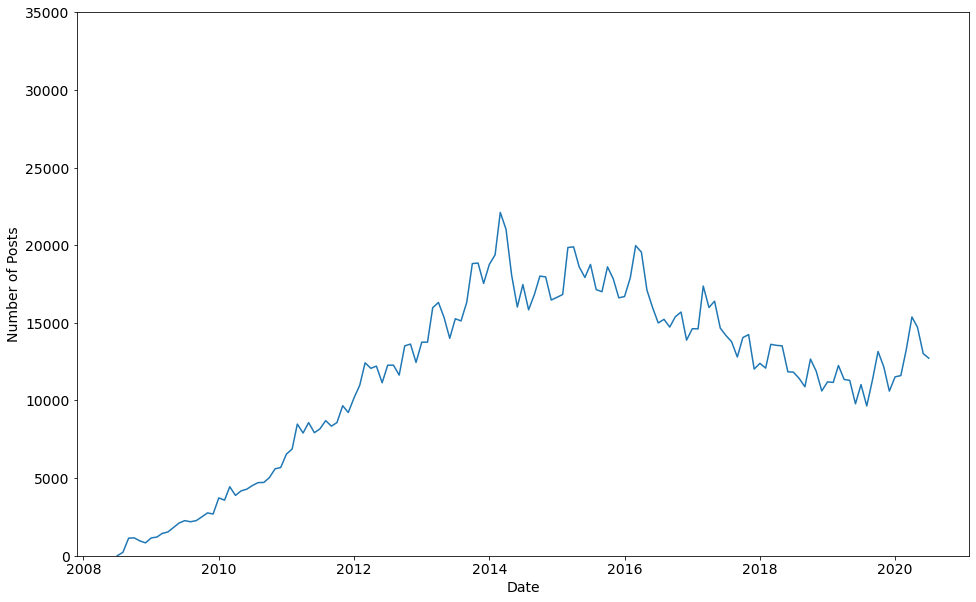

In [35]:
# 레이블 추가 및 y축 최저 0 설정
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df.java)

### 6. 맷플롯립을 이용한 다중 선형 차트 

- 만약  자바와 파이썬을 서로 같이 있는 두 개의 꺾은선형 차트를 그리려면 방법은 매우 간단하다. 
- 바로 ".plot()" 메소드를 두 번 호출하면 된다. 

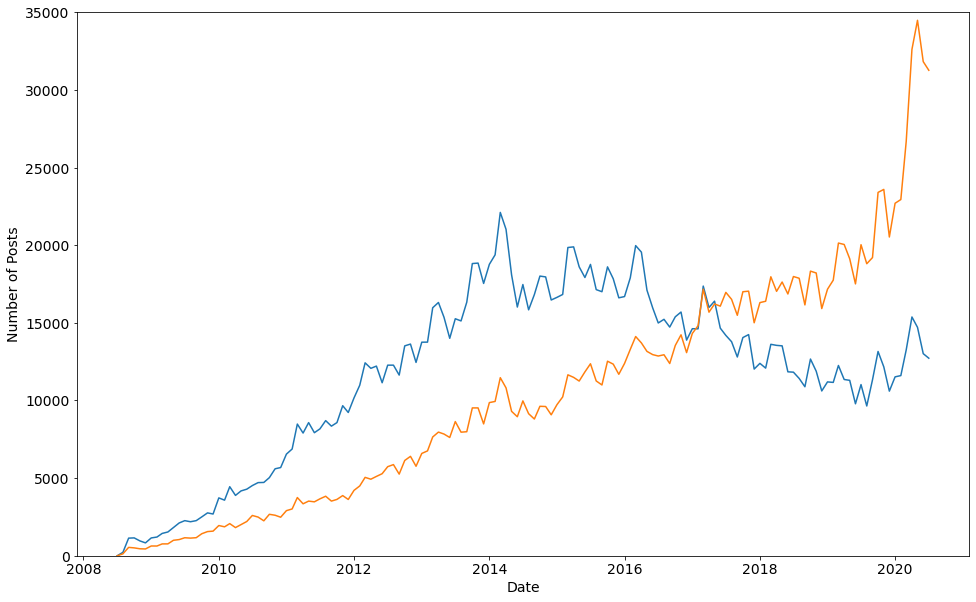

In [38]:
# 두 개의 꺾은선형 차트 그리기 - 자바와 파이썬 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

plt.plot(reshaped_df.index, reshaped_df.java)
plt.plot(reshaped_df.index, reshaped_df.python)

- 하지만 모든 개발 언어를 동일한 차트에 표시하려면 어떻게 해야 할까? 이때는 for 루프를 사용하면 된다.

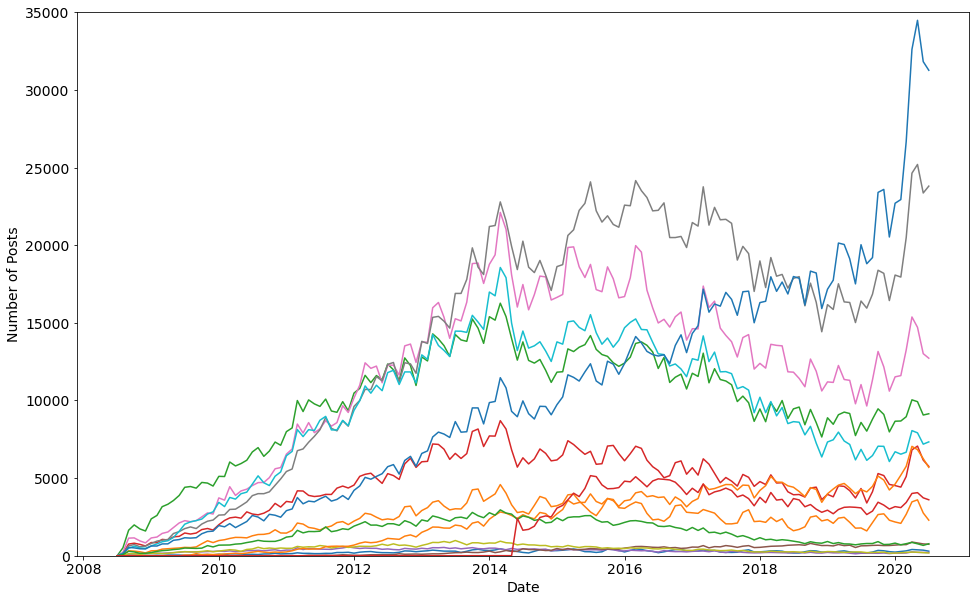

In [39]:
# 모든 개발 언어 동일한 차트에 꺾은선형으로 표시하기 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# plot all language using for loop
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column])

- 하지만 위와 같이 다중 선형 차트로 나타낼 경우 레이블이 없다면 어떤 색상이 파이썬인지 알수가 없다 
- 이럴 경우 열 이름을 기반으로 각 줄에 레이블을 추가하도록 해야 구분을 지을 수 있다.

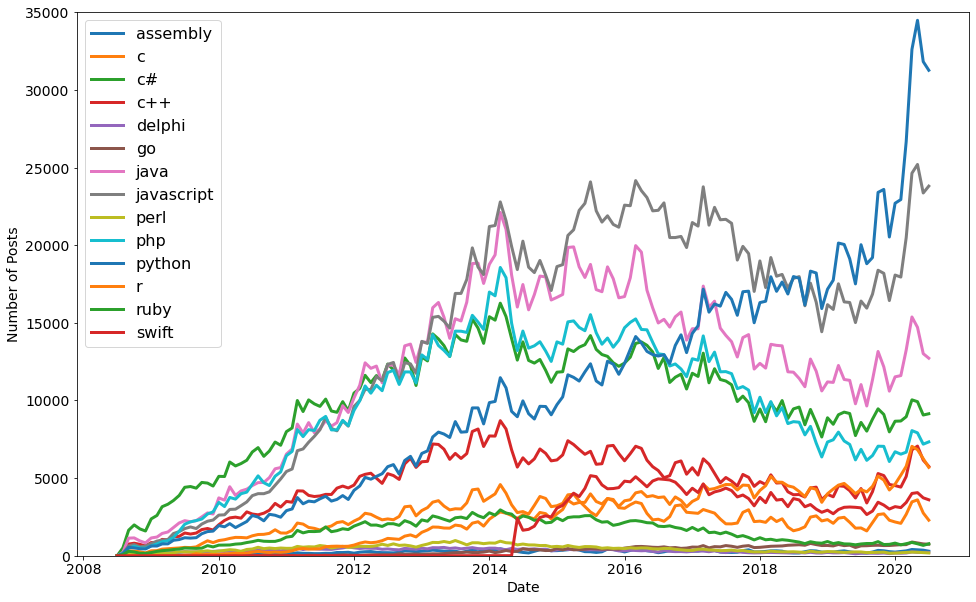

In [40]:
# 차트에 범례 추가 및 선 굵기 조절
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# plot all language using for loop
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column],
            linewidth=3, label=reshaped_df[column].name)
    
# show up legend
plt.legend(fontsize=16)

- 데이터 시각화 line chart를 보고 분석한 결과 스택 오버플로우에 있는 게시물 수로 보면 파이썬이 가장 인기 있는 개발 언어로 보여진다.

### 7. 시계열 데이터 다듬기 
- 위의 차트를 보면 시계열 데이터가 꽤 심하게 오르락 내리락 하는 것을 알 수 있다. 이렇게 되면 어떤 흐름인지 알기 힘들다. 
- 추세를 명확하게 보여주는 유용한 기술은 평균을 취하여 관측치를 평균화하는 것이다.6개 또는 12개의 관측값을 평균화하여 이동 평균이라고 하는 것을 구성할 수 있다. 
- 기본적으로 시간 단위로 평균을 계산하고 한번에 한 관측값씩 앞으로 이동한다.
- 이것은 매우 일반적인 기술이기 때문에 판다스 내에서 "rolling()"과 "mean()" 메소드를 내장하고 있다. 해당 두 메소드를 연결하여 평균 관측값으로 구성된 데이터프레임을 만들 수 있다.

In [41]:
# 창은 평균화된 관측치의 수 이다.
roll_df = reshaped_df.rolling(window=6).mean()
roll_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,296.000000,2431.000000,8807.000000,4851.166667,168.666667,687.000000,12050.000000,18252.000000,200.833333,6681.166667,23304.000000,4969.333333,780.000000,3238.000000
2020-04-01,305.500000,2567.000000,8903.500000,5105.333333,183.333333,721.666667,12420.166667,19293.333333,204.833333,6848.333333,24838.500000,5288.000000,771.166667,3332.166667
2020-05-01,316.000000,2716.833333,9040.166667,5421.500000,190.166667,749.500000,12844.500000,20461.500000,203.666667,6993.333333,26653.166667,5614.166667,779.166667,3465.666667


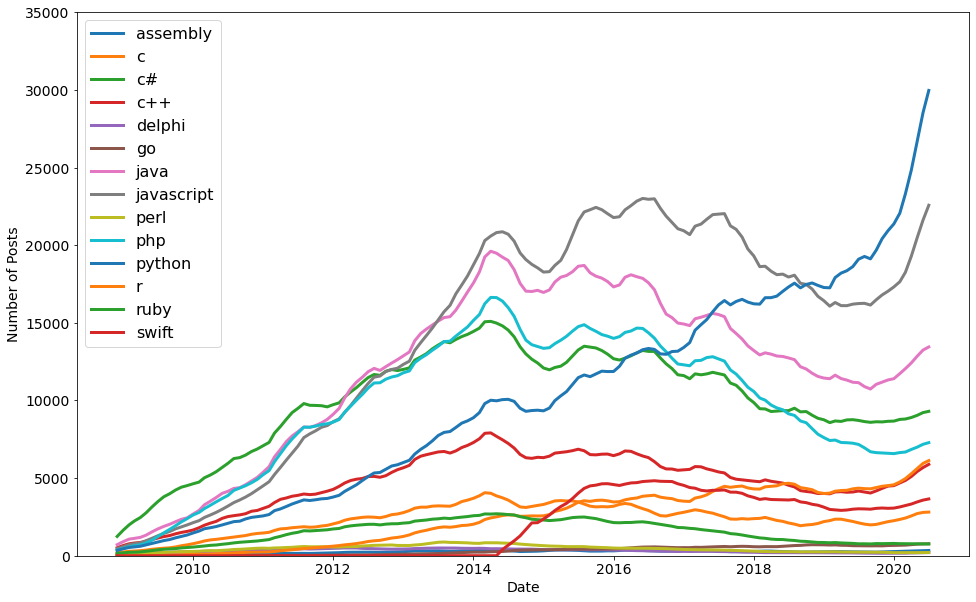

In [42]:
# 맷플롯립으로 그래프 그리기 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)

- window의 인자를 6으로 했을 때 위와 같은 추세선이 나온다. 그럼 3 또는 12로는 어떻게 변할까? 

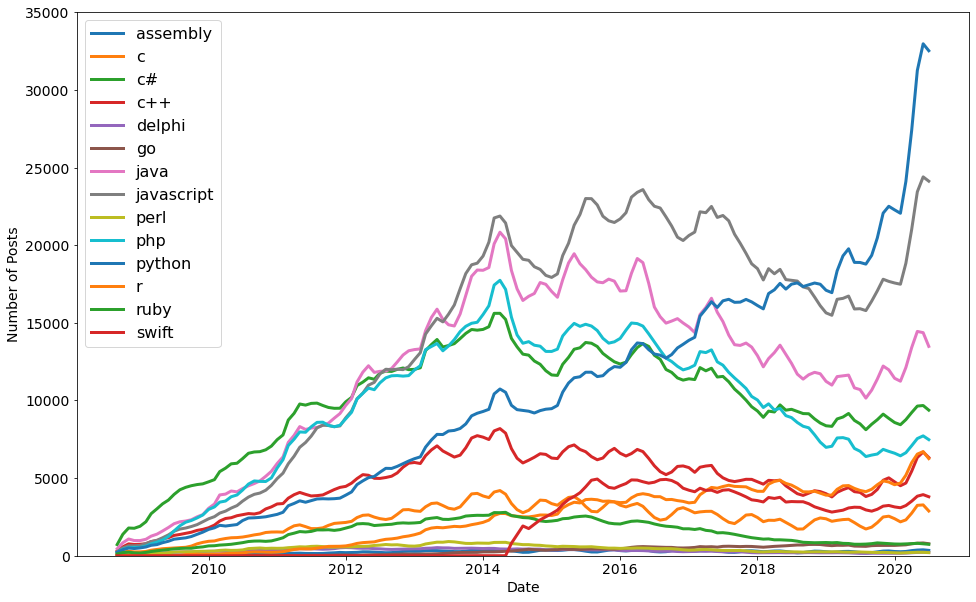

In [43]:
# 창은 평균화된 관측치의 수 3으로 지정
roll_df = reshaped_df.rolling(window=3).mean()

# 맷플롯립으로 그래프 그리기 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)

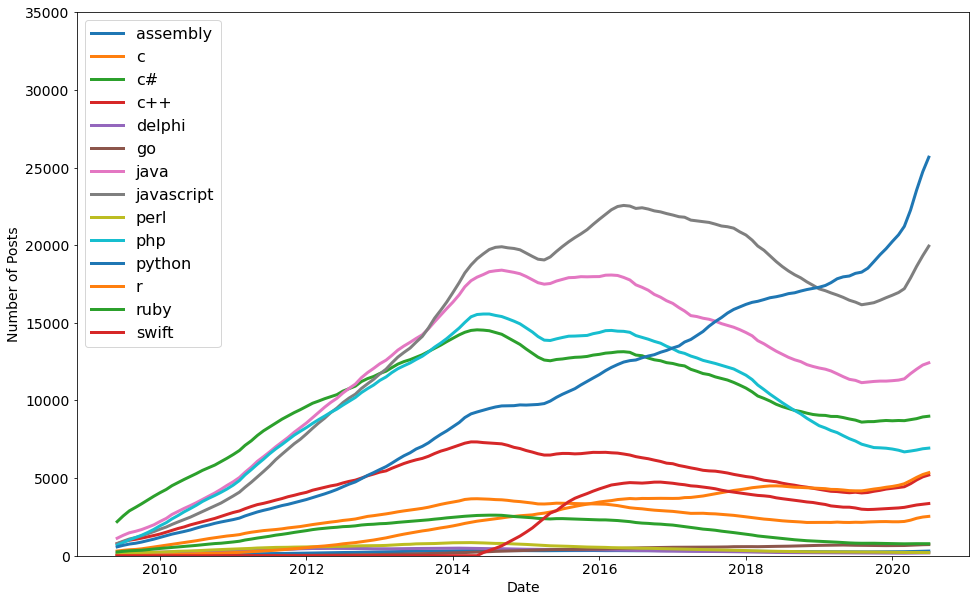

In [44]:
# 창은 평균화된 관측치의 수 12로 지정
roll_df = reshaped_df.rolling(window=12).mean()

# 맷플롯립으로 그래프 그리기 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)

### Study 핵심 요약 
- 금일 Study 사항 정리 
    - ".groupby()"를 사용하여 개발 언어당 게시물 및 항목 수 탐색
    - to_datetime()을 사용하여 문자열을 날짜 객체로 변환
    - ".pivot()"을 사용하여 범주를 열로 변환하여 데이터프레임을 재구성
    - ".count()"와 "isna().values.any()"를 사용하여 데이터프레임에서 NaN 값을 찾은 다음, ".fillna()"를 사용하여 대체
    - for루프와 ".plot()"을 사용하여 (여러 개의) 꺾은선형 차트를 생성
    - 크기, 레이블, 축의 상한 및 하한을 변경하여 차트의 스타일을 지정
    - 색상으로 라인을 구분하기 위해 범례를 추가
    - ".rolling().mean()"을 사용하여 시계열 관측치를 매끄럽게 만들고 시간 경과에 따른 추세를 더 잘 알아볼 수 있도록 표시